Набор данных "Mall_Customers.csv" содержит информацию о клиентах торгового центра: 

- CustomerID - id клиента
- Gender - пол
- Age - возраст
- Annual Income (k$) - годовой доход
- Spending Score - оценка расходов (от 1 до 100)

Используйте иерархический кластерный анализ и k-means, чтобы разделить клиентов на группы. Для сегментации используйте два признака: Annual Income (k$), Spending Score (1-100).

Объясните выбор количества кластеров, визуализируйте кластеры, проанализируйте каким образом клиенты распределились между кластерами.

## Иерархический кластерный анализ
> Суть иерархической кластеризации состоит в последовательном объединении меньших кластеров в большие или разделении больших кластеров на меньшие.
> Агломеративные методы: новые кластеры создаются путем объединения более мелких кластеров.
> Дивизимные методы: новые кластеры создаются путем деления более крупных кластеров на более мелкие.
> Рассмотрим, как происходит объединение меньших кластеров в большие.
> - Шаг 0. Каждое наблюдение – отдельный кластер.
> - Шаг 1. Два соседних кластера объединяются в один и т.д.
>
> Этот процесс продолжается до тех пор, пока все объекты не будут объединены в один кластер.

In [3]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1}) 
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(data, 'ward', 'euclidean')

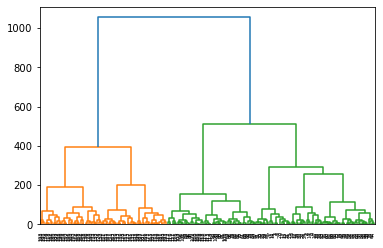

In [7]:
dn = dendrogram(link)

In [8]:
data['Кластер'] = fcluster(link, 4, criterion='maxclust')

In [9]:
data.groupby('Кластер').sum()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Кластер,,,,,
1,6029,18,1492,3235,673
2,6318,21,1275,3375,3203
3,5145,31,2075,3149,2620
4,2608,42,2928,2353,3544


## K-Means
> Алгоритм k-means
> Алгоритм k-средних (k-means, быстрый кластерный анализ) – наиболее популярный метод среди неиерархических методов кластерного анализа.
>
>  В отличие от иерархических методов, которые не требуют предварительных предположений о числе кластеров, для использования k-means необходимо иметь гипотезу о наиболее вероятном количестве кластеров.
>
> Алгоритм k-средних – итерационная процедура, которую можно описать следующими шагами:
>
> 1. Выбирается число кластеров k.
> 2. Выбраются k точек, находящихся, вероятно, в разных кластерах, и они объявляются начальными центрами кластеров.
> 3. Для каждого наблюдения определяется ближайший центр кластера. Наблюдения, ближайшие к центрам, образуют начальные кластеры.
> Для того, чтобы сравнивать два объекта, необходимо иметь критерий, на основании которого будет происходить сравнение. Таким критерием является расстояние между объектами. В методе k-means используется только евклидово расстояние.
> 4. Вычисляются центроиды – центры тяжести кластеров. Каждый центроид – это вектор, элементы которого представляют собой средние значения соответствующих признаков, вычисленные по всем наблюдениям в кластере. Центр кластера смещается в его центроид и центроид становится центром нового кластера.
> 5. 3-й и 4-й шаги итеративно повторяются. На каждой итерации происходит изменение границ кластеров и смещение их центров. В результате минимизируется расстояние между элементами внутри кластеров, и увеличиваются межкластерные расстояния.
> Остановка алгоритма происходит тогда, когда границы кластеров и расположения центроидов перестают изменяться от итерации к итерации, т.е. на каждой итерации в каждом кластере остается один и тот же набор наблюдений. 

In [10]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1}) 
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state = 0)
kmeans.fit(data)

data['Кластер'] = kmeans.labels_
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Кластер
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,3
3,4,1,23,16,77,3
4,5,1,31,17,40,3


Метод локтя

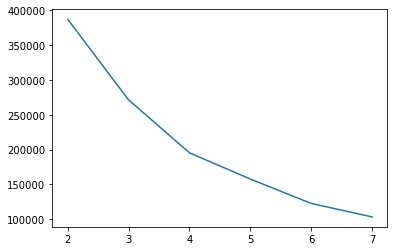

In [13]:
criterion = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    criterion.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 8), criterion)

Предпологаем, что оптимальное количество кластеров = 4

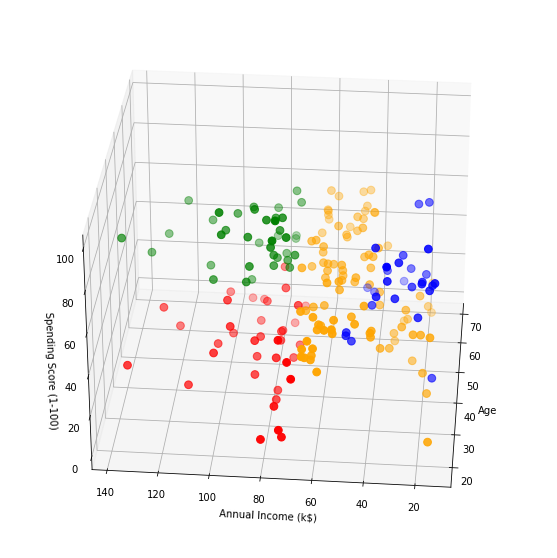

In [14]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(data.iloc[:,1:])
data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()



In [15]:
data.loc[data['Кластер'] == 0].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Кластер,label
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.0
mean,164.000000,0.472222,40.805556,87.916667,17.888889,0.0,1.0
std,21.071308,0.506309,11.305674,16.231143,10.708549,0.0,0.0
min,129.000000,0.000000,19.000000,71.000000,1.000000,0.0,1.0
25%,146.500000,0.000000,34.000000,77.000000,10.000000,0.0,1.0
50%,164.000000,0.000000,41.500000,83.000000,16.000000,0.0,1.0
75%,181.500000,1.000000,47.250000,97.250000,24.500000,0.0,1.0
max,199.000000,1.000000,59.000000,137.000000,40.000000,0.0,1.0


In [16]:
data.loc[data['Кластер'] == 1].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Кластер,label
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.0,66.000000
mean,92.484848,0.560606,43.878788,57.727273,49.257576,1.0,2.848485
std,19.379007,0.500117,17.170202,6.929414,6.615391,0.0,0.613751
min,58.000000,0.000000,18.000000,44.000000,29.000000,1.0,0.000000
25%,76.250000,0.000000,26.250000,54.000000,44.500000,1.0,3.000000
50%,92.500000,1.000000,47.000000,59.500000,49.000000,1.0,3.000000
75%,108.750000,1.000000,58.500000,63.000000,55.000000,1.0,3.000000
max,127.000000,1.000000,70.000000,71.000000,60.000000,1.0,3.000000


In [17]:
data.loc[data['Кластер'] == 2].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Кластер,label
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.0,39.0
mean,162.000000,0.538462,32.692308,86.538462,82.128205,2.0,2.0
std,22.803509,0.505035,3.728650,16.312485,9.364489,0.0,0.0
min,124.000000,0.000000,27.000000,69.000000,63.000000,2.0,2.0
25%,143.000000,0.000000,30.000000,75.500000,74.500000,2.0,2.0
50%,162.000000,1.000000,32.000000,79.000000,83.000000,2.0,2.0
75%,181.000000,1.000000,35.500000,95.000000,90.000000,2.0,2.0
max,200.000000,1.000000,40.000000,137.000000,97.000000,2.0,2.0


In [18]:
data.loc[data['Кластер'] == 3].describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Кластер,label
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,59.000000
mean,30.067797,0.627119,36.101695,29.864407,49.864407,3.0,1.677966
std,17.295469,0.487722,13.731031,9.685499,27.887371,0.0,1.502190
min,1.000000,0.000000,18.000000,15.000000,3.000000,3.0,0.000000
25%,15.500000,0.000000,24.000000,20.000000,30.000000,3.0,0.000000
50%,30.000000,1.000000,33.000000,29.000000,51.000000,3.0,3.000000
75%,44.500000,1.000000,48.500000,39.000000,73.000000,3.0,3.000000
max,62.000000,1.000000,67.000000,46.000000,99.000000,3.0,3.000000
